# Sampling and Sampling Statistics

- Central limit theorem
- Sampling statistics from Normal distributions

# Hands-on computational experiments

- Let us prepare one population distribution such as uniform, normal, t, etc. 
- We collect samples from the predefined population distribution and calculate sample means
- We find out the distribution of the sample means. 

# How to repeat jobs in Python : For Statements

## For Loops

- For loop consists of (1) Header and (2) Block containing commands that you want to repeat.
- Header to specify how many times you repeat. 
- Block contains a series of python commands to repeat

## Header

- i = iterator variable
- some squence following "in" = You can use range function

## Example: Printing a sentence 10 times

In [2]:
for i in range(10):
    print("Hello")

Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello


## Range : a function to generate an integer sequence

- range(l,m,n) : You can specify three integers to generate an integer sequence
- l = the starting integer
- m = where your sequence stops, it means that your sequence stops right before m. 
- n = incremental step size

In [4]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [6]:
list(range(1,10,1))

[1, 2, 3, 4, 5, 6, 7, 8, 9]

## Example : Print integers from 1 to 10

- For the 1st iteration, your iterator i has the first element of the sequence of the header: i = 1
- After having the first element, your iterator enters the block, which is "print(i)", so 1 is printed on your screen. 
- After finishing the 1st iteration, your program goes back to the Header, and it starts with the next iteration. 
- For the 2nd iteration, your iterator i takes the second element of the given sequence, which is i=2 in this example. 
- Then it enters the block and run the code "print(i)". So 2 is printed on your screen. 
- After finishing the 2nd iteration, your program goes back to the header again, and it begins the 3rd iteration, 
- so on......
- For the last iteration, your iterator takes the last element of the given sequence, which is 10 in this example. 
- Having the last element, your iterator i enters the block and run "print(i)". You can see 10 on your screen. 
- After finishing the last iteration, it never goes back to the header. Instead it moves to next commands following the for loop. 


In [9]:
for i in range(1,11,1):
    print(i)
    
print("End")    

1
2
3
4
5
6
7
8
9
10
End


## Indentation : four blank spaces

- Indentation is used in order to specify block (commands to repeat). 
- Previously, print("End") is outside the for loop, because it does not have an identation. 
- But if you add an indenation to print("End"), now the print("End") moves inside the for loop, which means it is repeated. 

In [10]:
for i in range(1,11,1):
    print(i)
    print("End")    

1
End
2
End
3
End
4
End
5
End
6
End
7
End
8
End
9
End
10
End


# Let us do Sampling experiments

## 1. Uniform distribution as our population distribution

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
from scipy.stats import uniform, f, t, chi2
from scipy.stats import norm

In [13]:
population = uniform()
mean, var = population.stats(moments="mv")
print(mean, var)

0.5 0.08333333333333333


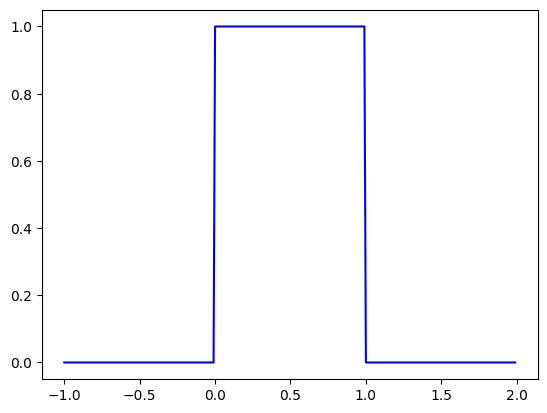

In [16]:
x = np.arange(-1, 2, 0.01)
fig, ax = plt.subplots(1, 1)
ax.plot(x, population.pdf(x), color="blue")
plt.show()

## 2. How to collect a sample out of your population

In [33]:
sample = population.rvs(size=5)
print(sample, np.mean(sample))

[0.22969042 0.94733633 0.3507079  0.81728696 0.61345522] 0.5916953648357393


In [36]:
for i in range(10):
    sample = population.rvs(size=5)
    print(sample, np.mean(sample))

[0.59993421 0.83123234 0.56401134 0.73455239 0.97597646] 0.7411413474128379
[0.52788285 0.22340205 0.13490891 0.11554107 0.19169224] 0.23868542239351648
[0.01881319 0.07083723 0.65652945 0.76354715 0.42672027] 0.38728945907827333
[0.23189203 0.83967159 0.77163024 0.02823955 0.17154501] 0.40859568615938324
[0.77893119 0.76706761 0.7863982  0.49387664 0.60095769] 0.6854462644173113
[0.10093188 0.61118393 0.00223794 0.31012752 0.2411978 ] 0.25313581175921746
[0.56109113 0.292522   0.28667534 0.25523003 0.56981084] 0.3930658682436964
[0.8894897  0.14495139 0.2625385  0.40572793 0.78442408] 0.4974263173899294
[0.73630681 0.36746638 0.17489992 0.67222877 0.81777362] 0.5537351011255243
[0.08056504 0.15704898 0.51260785 0.48812827 0.65347141] 0.3783643095409883


### n = 5

In [37]:
a = [1,2,3,4]
a.append(5)
print(a)

[1, 2, 3, 4, 5]


In [62]:
n = 5 # sample size
sample_means = [] # empty list to save sample means

for i in range(10000):
    sample = population.rvs(size=n)
    sample_means.append(np.mean(sample))

<AxesSubplot: ylabel='Count'>

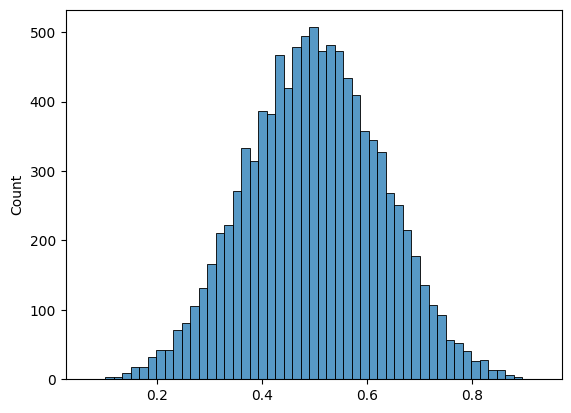

In [63]:
sns.histplot(sample_means)

<AxesSubplot: ylabel='Density'>

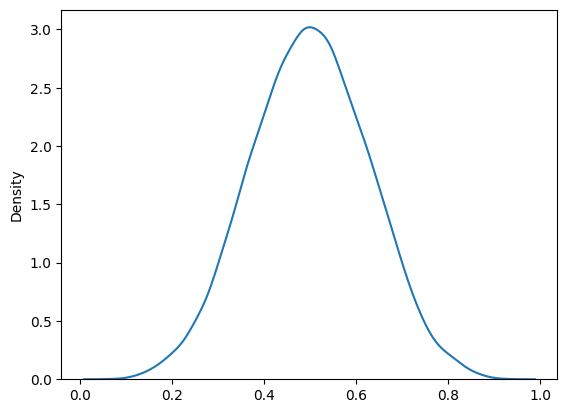

In [64]:
sns.kdeplot(sample_means)

In [65]:
rv = norm(loc=mean, scale=np.sqrt(var)/np.sqrt(n))

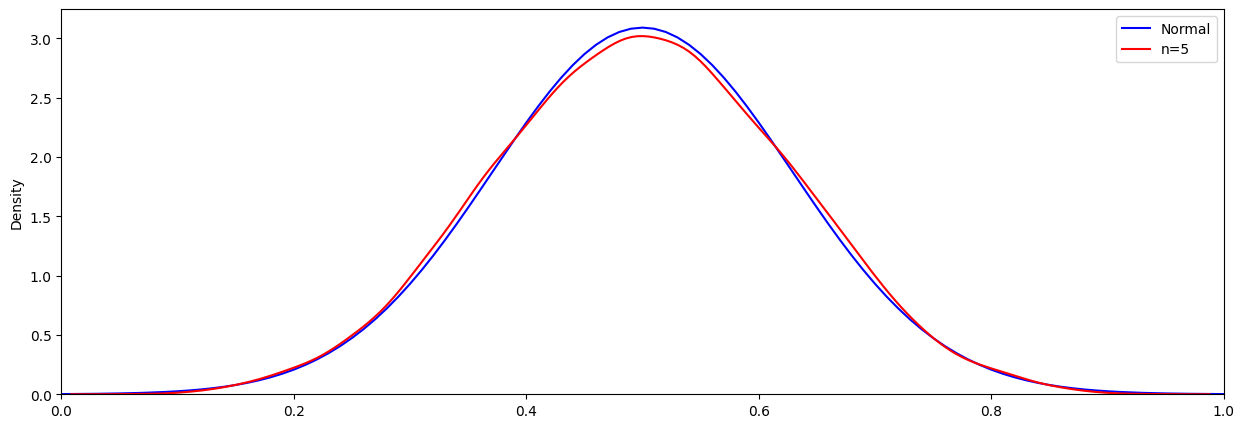

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))
x = np.arange(-3, 3, 0.01)
ax.plot(x, rv.pdf(x), color="blue", label="Normal")
sns.kdeplot(sample_means, color="red", label="n=5", ax=ax)
ax.set_xlim(0,1)
ax.legend()
plt.show()

## n = 10

In [59]:
n = 10 # sample size
sample_means = [] # empty list to save sample means

for i in range(10000):
    sample = population.rvs(size=n)
    sample_means.append(np.mean(sample))

In [60]:
rv = norm(loc=mean, scale=np.sqrt(var)/np.sqrt(n))

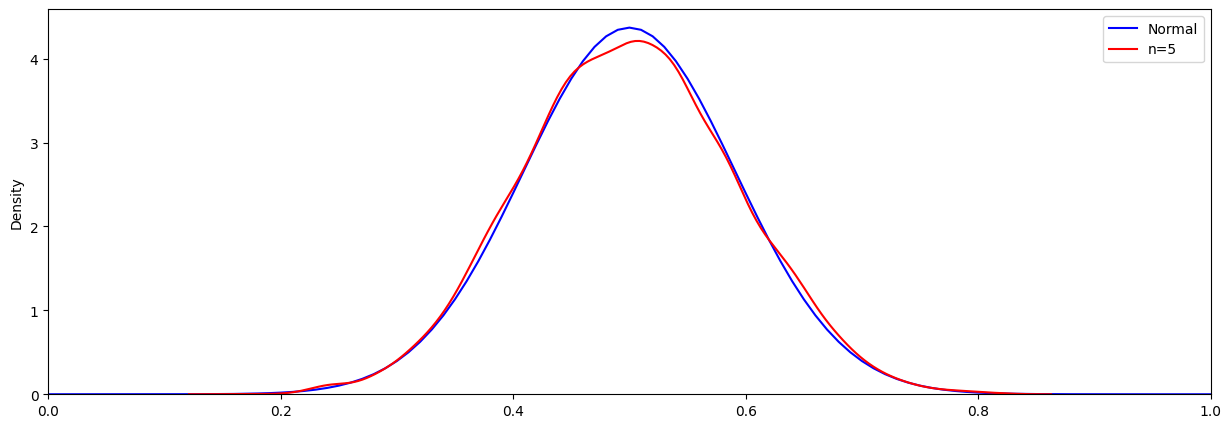

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))
x = np.arange(-3, 3, 0.01)
ax.plot(x, rv.pdf(x), color="blue", label="Normal")
sns.kdeplot(sample_means, color="red", label="n=5", ax=ax)
ax.set_xlim(0,1)
ax.legend()
plt.show()

## n = 20

In [56]:
n = 20 # sample size
sample_means = [] # empty list to save sample means

for i in range(10000):
    sample = population.rvs(size=n)
    sample_means.append(np.mean(sample))

In [57]:
rv = norm(loc=mean, scale=np.sqrt(var)/np.sqrt(n))

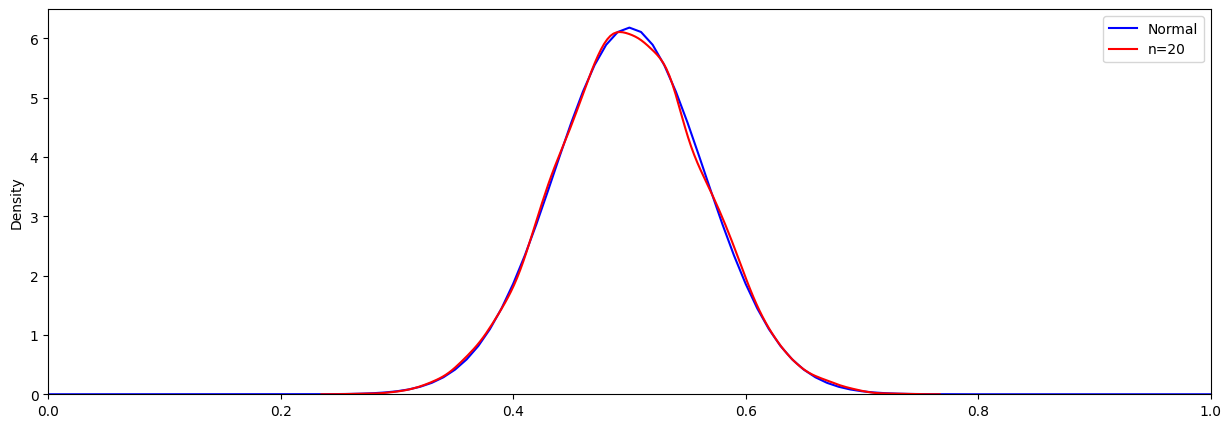

In [58]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))
x = np.arange(-3, 3, 0.01)
ax.plot(x, rv.pdf(x), color="blue", label="Normal")
sns.kdeplot(sample_means, color="red", label="n=20", ax=ax)
ax.set_xlim(0,1)
ax.legend()
plt.show()

## n = 100

In [71]:
n = 100 # sample size
sample_means = [] # empty list to save sample means

for i in range(100000):
    sample = population.rvs(size=n)
    sample_means.append(np.mean(sample))

In [72]:
rv = norm(loc=mean, scale=np.sqrt(var)/np.sqrt(n))

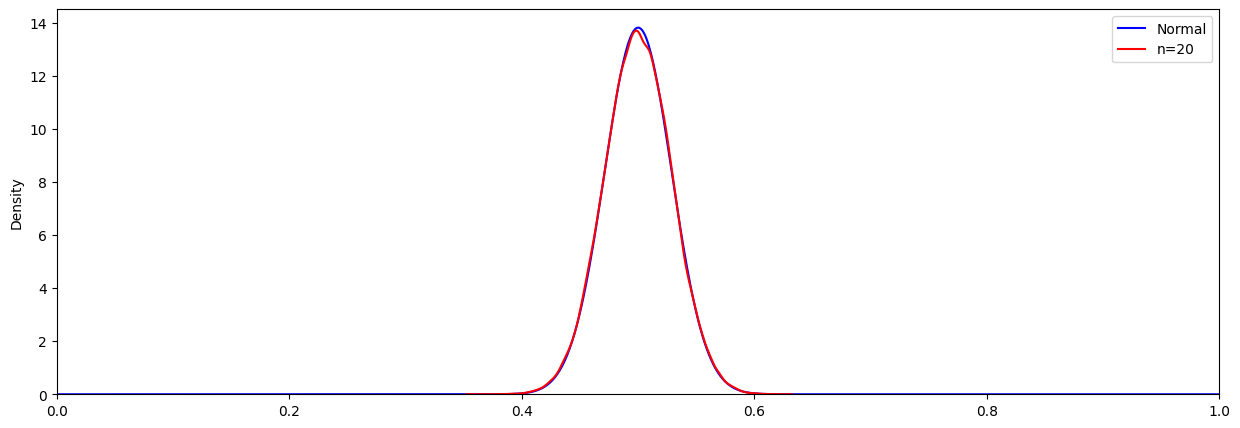

In [73]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))
x = np.arange(-3, 3, 0.001)
ax.plot(x, rv.pdf(x), color="blue", label="Normal")
sns.kdeplot(sample_means, color="red", label="n=20", ax=ax)
ax.set_xlim(0,1)
ax.legend()
plt.show()